
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
spark.version



'3.0.0'

In [5]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [7]:
# 1.read CSV file
df_housing=spark.read.csv('/content/BostonHousing.csv',header=True, inferSchema=True)

In [8]:
# 2.show the first 5 rows
df_housing.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [9]:
#3. number of observations
# Get the number of rows
num_rows = df_housing.count()

# Get the number of columns
num_columns = len(df_housing.columns)

# Display the shape of the DataFrame
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 506
Number of Columns: 14


In [10]:
#6.print schema
df_housing.printSchema

<bound method DataFrame.printSchema of DataFrame[crim: double, zn: double, indus: double, chas: int, nox: double, rm: double, age: double, dis: double, rad: int, tax: int, ptratio: double, b: double, lstat: double, medv: double]>

In [11]:
# 6.print schema
import pandas as pd
pd.DataFrame(df_housing.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,crim,double
1,zn,double
2,indus,double
3,chas,int
4,nox,double
5,rm,double
6,age,double
7,dis,double
8,rad,int
9,tax,int


In [12]:
#7.drop the b column
df_housing=df_housing.drop("b")
df_housing.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 5 rows



In [13]:
#8.
from pyspark.sql.functions import round

#  Round all of the numerical columns into two decimal place
for column_name in df_housing.columns:
    df_housing = df_housing.withColumn(column_name, round(df_housing[column_name], 2))
df_housing.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



In [14]:
#9.
from pyspark.sql.functions import expr


#  create a new column 'Age10' with a 10% increase of 'age'
df_housing = df_housing.withColumn("Age10", expr("age * 1.10"))

# Show the updated DataFrame
df_housing.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
only showing top 5 rows



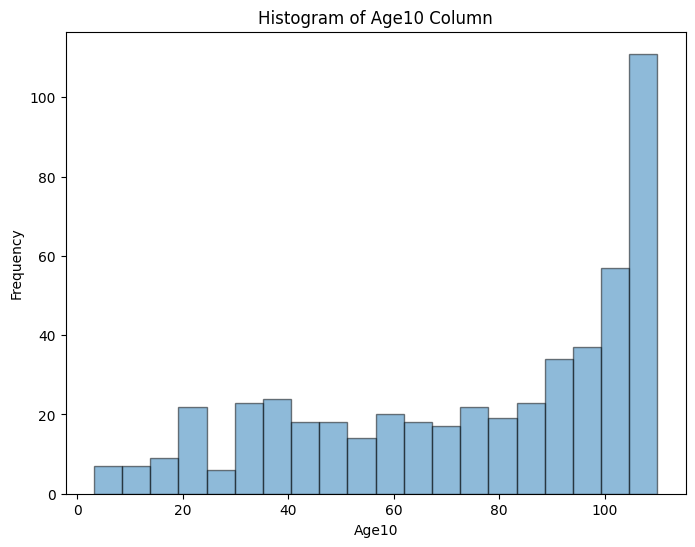

In [15]:
#10.
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df_housing.toPandas()

# Plot the 'Age10' column as a 2D plot
plt.figure(figsize=(8, 6))
plt.hist(df_pandas['Age10'], bins=20, edgecolor='k', alpha=0.5)
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.title('Histogram of Age10 Column')
plt.grid(False)
plt.show()







In [16]:
# 11. summary of the statistics
df_housing.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [17]:
#12. Convert  Spark Dataframe to Pandas Dataframe

df_pandas_housing = df_housing.toPandas()

In [18]:
 # 13. the last 5 rows of Pandas DataFrame
last_5_rows = df_pandas_housing.tail(5)
print(last_5_rows)

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  


In [19]:
spark.sparkContext.stop()